In [2]:
import rasterio
import numpy as np
import matplotlib as mpl
import subprocess
from matplotlib import pyplot as plt
from rasterio.merge import merge
import geopandas as gpd
import os, math

import gdal, gdalconst, gdalnumeric
from gdal import FillNodata as FillWithMask

Fill L7_Data/20130302/B4.TIF with L7_Data/20130302_gap_mask/B4.TIF
Fill L7_Data/20130302/B2.TIF with L7_Data/20130302_gap_mask/B2.TIF
Fill L7_Data/20130302/B1.TIF with L7_Data/20130302_gap_mask/B1.TIF
Fill L7_Data/20130302/B7.TIF with L7_Data/20130302_gap_mask/B7.TIF
Fill L7_Data/20130302/B3.TIF with L7_Data/20130302_gap_mask/B3.TIF
Fill L7_Data/20130302/B5.TIF with L7_Data/20130302_gap_mask/B5.TIF


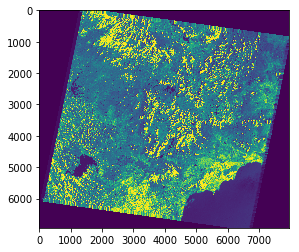

In [7]:
folder_ts = os.path.join('L7_Data', '20130302')
for root, dir, filenames in os.walk(folder_ts):
    for file in filenames:
        raw_data = os.path.join(folder_ts, file)
        mask_data = os.path.join('L7_Data', '20130302_gap_mask', file)
        
        print('Fill {0} with {1}'.format(raw_data, mask_data))
        
        
        raw_data = gdal.Open(raw_data, gdal.GA_Update)
        mask_data = gdal.Open(mask_data)

        source = raw_data.GetRasterBand(1)
        mask = mask_data.GetRasterBand(1)
        
        FillWithMask(source, mask, 100, 0)
                
        raw_data = None
        mask_data = None
        source = None
        mask = None
        